# Weibel instability


In [9]:
# Use finite difference 2D EM code
import em2d as zpic

# Use spectral 2D EM code
#import em2ds as zpic

import numpy as np

nx = [128,128]
box = [12.8,12.8]
dt = 0.07
tmax = 35.0

ppc = [2,2]
ufl = [0.0,0.0,0.6]
uth = [0.1,0.1,0.1]

electrons = zpic.Species( "electrons", -1.0, ppc, ufl = ufl, uth = uth )

ufl[2] = -ufl[2]
positrons = zpic.Species( "positrons", +1.0, ppc, ufl = ufl, uth = uth )

sim = zpic.Simulation( nx, box, dt, [electrons,positrons] )

# Run the simulation
sim.run( tmax )


Running simulation up to t = 35 ...
n = 501, t = 35.07
Done.


## Magnetic Field

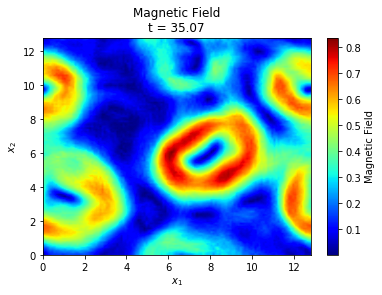

In [10]:
import matplotlib.pyplot as plt

Bperp = np.sqrt( sim.emf.Bx**2 + sim.emf.By**2 )

range = [[0,sim.box[0]],[0,sim.box[1]]]

plt.imshow( Bperp, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'jet')

plt.colorbar().set_label('Magnetic Field')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Magnetic Field\nt = {:g}".format(sim.t))

plt.show()

## Electric Current

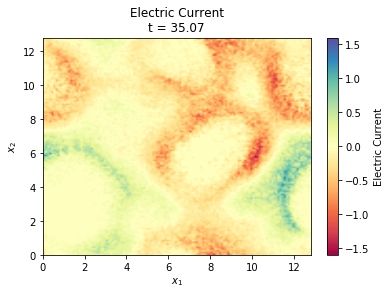

In [11]:
import matplotlib.pyplot as plt

J3 = sim.current.Jz

range = [[0,sim.box[0]],[0,sim.box[1]]]


plt.imshow( J3, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'Spectral',clim = (-1.6,1.6))

plt.colorbar().set_label('Electric Current')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Electric Current\nt = {:g}".format(sim.t))

plt.show()

## Charge Density

Besides the raw simulation data, we can also access diagnostic data that needs to be generated, such as the charge density. These diagnostics can be generated on the fly; to get the charge density from a `Species` object we use the `charge()` method:

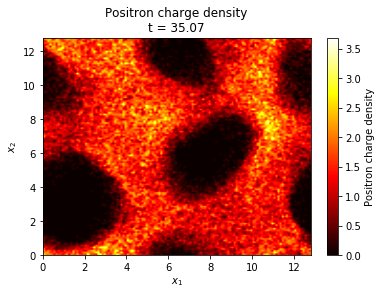

In [12]:
import matplotlib.pyplot as plt

charge = positrons.charge()

range = [[0,sim.box[0]],[0,sim.box[1]]]


plt.imshow( charge, interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'hot')

plt.colorbar().set_label('Positron charge density')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Positron charge density\nt = {:g}".format(sim.t))

plt.show()